In [1]:
from amnesiac import blurry_memory
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import string
import statistics 

In [2]:
random.seed(10)

In [3]:
def fitness(population,user_id,passwd_no):
    '''
    calculates the match percentage(fitness) of each popul-
        ation chromosome and returns a list of list with [-
        [chrmosome,int(fitness*10)],[..]]
    params, population, a list
        user_id, integer
        passwd_no, integer, 0 or 1
    return list, fitness scored population       
    '''
    return [[i,int(blurry_memory([''.join(i)],user_id,passwd_no)[''.join(i)]*10)] for i in population]

In [4]:
def select_parents(fitness_scores,method='rank'):
    '''
    performs selection of parents on the basis of method, 
        (rank,mixed_rank,tournament)
    rank, top N parents are returned from the sorted fitne-
        ess scores
    mixed_rank, 60 % top parents, 20% worst parents and 20-
        % random parents are selected, evalaution is done
        on fitness_score
    params, fitness_scores, list of list object
        method, string
    returns list, N parent list
    '''
    if method == 'rank':
        return [i[0] for i in sorted(fitness_scores, key=lambda x: x[1], reverse = True)[:num_parents]]
    if method == 'mixed_rank':
        fitness_scores_sorted = sorted(fitness_scores, key=lambda x: x[1], reverse = True)
        parents = [i[0] for i in fitness_scores_sorted]
        selected_parents = parents[:int(num_parents*0.6)]+parents[-int(num_parents*0.2):]
        return random.choices(parents[int(num_parents*0.6):-int(num_parents*0.2):],k=int(num_parents*0.2)) + selected_parents
    if method == 'tournament':
        parents_list = []
        while len(parents_list) <= num_parents:
            best_random_tounamenet_players = random.choices(fitness_scores,k=3)
            best_random_tounamenet_players = sorted(best_random_tounamenet_players, key=lambda x: x[1], reverse = True)
            parents_list.append(best_random_tounamenet_players[0][0])
            fitness_scores.remove(best_random_tounamenet_players[0])
        return parents_list

In [5]:
# reproduction (gen -1) * population
def create_children(all_parents):
    '''
    randomly select two parent from population corpus and 
    performs crossover
    params, all_parents, list
    return, children, list
    '''
    children = []
    for i in range(len(population)):
        parent1 = all_parents[int(random.random() * len(all_parents))]
        parent2 = all_parents[int(random.random() * len(all_parents))]
        children.append(crossover(parent1,parent2))
    return children


# crossover logic
def crossover(parent1,parent2):
    '''
    performs N-point (2) cross over between parent1 and pa-
        rent 2, first calculates the 2 points in startGene
        and endGene then if the random value is greater th-
        an 0.5 perform and return [parent1:parent2:parent1-
        ] else [parent2:parent1:parent2] 
    params, parent1, list
        parent2, list
    returns, list, children    
    '''
    [startGene,endGene] = sorted(random.choices(range(passcode_length),k=2))
    if random.random()>0.5:
        return parent1[:startGene]+parent2[startGene:endGene]+parent1[endGene:]
    else:
        return parent2[:startGene]+parent1[startGene:endGene]+parent2[endGene:]

In [6]:
def mutation(childrens):
    '''
    performs chnage in chrmosome of the given childrens i-
        f the randomness factor is less than mutation_rate
    params, childrens, list
    return, list, childrens
    '''
    for i,child in enumerate(childrens):
        if random.random() < mutation_rate:
            #mutate if rate is less mutation_rate percent 
            childrens[i][int(random.random() * passcode_length)] = random.choice(passcode_options)
    return childrens

Passwod resolved in21generations and0.33693647384643555seconds 
Discovered passcode = 1_L1K3TH4T


/home/nv/virtpy3tf/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


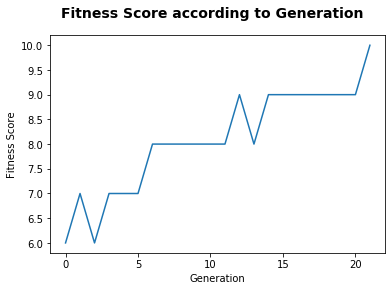

In [7]:
# Q2 a 
password_option = 1
population_size = 1000
num_parents = 500
mutation_rate = 0.2
passcode_options = list(string.ascii_uppercase+string.digits+'_')
passcode_length = 10
# generate a popluation of list of list [[list(chromosome1)],[list(chromosome2)],[]]
population = [random.choices(passcode_options,k=passcode_length) for i in range(population_size)]
selection_method = 'tournament'

fitness_tracker = []
fitness_scores_list = []
generations = 0
t_start = time.time()
while True:
    fitness_scores = fitness(population,190573735,password_option)
    fitness_scores_list.append(fitness_scores)
    if max([i[1] for i in fitness_scores]) == passcode_length:
        time_taken = time.time() - t_start
        password_resolved = ''.join([i[0] for i in fitness_scores if i[1] == passcode_length][0])        
        print("Passwod resolved in"+str(generations)+"generations and"+str(time_taken)+"seconds \nDiscovered passcode =",password_resolved)
        break
    parents = select_parents(fitness_scores,method=selection_method)
    children = create_children(parents)
    population = mutation(children)
    generations += 1    
    
fitness_tracker = [max([i[1] for i in fitness_scores_list[j]]) for j in range(len(fitness_scores_list))]        
fig = plt.figure()
plt.plot(list(range(generations+1)), fitness_tracker)
fig.suptitle('Fitness Score according to Generation', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness Score')
# plt.savefig('images/'+str(password_option)+'_'+str(population_size)+'_'+str(num_parents)+'_'+str(mutation_rate)+'_'+str(selection_method)+'-'+str(generations)+'-'+str(round(time_taken,3))+'.png',dpi=300, bbox_inches='tight')
plt.show()



In [8]:
password_option = 0
population_size = 100
num_parents = 75
mutation_rate = 0.2
passcode_options = list(string.ascii_uppercase+string.digits+'_')
passcode_length = 10
selection_method_list = ['tournament','rank','mixed_rank']

for selection_method in selection_method_list:
    reproduction_list = []
    time_list=[]
    print('working on',selection_method, 'please wait...')
    for i in range(50):
        fitness_tracker = []
        fitness_scores_list = []
        generations = 0
        population = [random.choices(passcode_options,k=passcode_length) for i in range(population_size)]
        t_start = time.time()
        while True:
            fitness_scores = fitness(population,190573735,password_option)
            fitness_scores_list.append(fitness_scores)
            if max([i[1] for i in fitness_scores]) == passcode_length:
                time_taken = time.time() - t_start
                password_resolved = ''.join([i[0] for i in fitness_scores if i[1] == passcode_length][0]) 
                reproduction_list.append(generations*population_size)
                time_list.append(time_taken)
#                 f.write(str(generations)+','+str(generations*population_size)+','+str(time_taken)+'\n')
#                 print("Passwod resolved in {} generations and {} seconds! \nDiscovered passcode = {}".format(generations,time_taken,password_resolved))
                break
            parents = select_parents(fitness_scores,method=selection_method)
            children = create_children(parents)
            population = mutation(children)
            generations += 1    
    print("Average Reproductions for 50 iterations for",selection_method,"are",np.average(reproduction_list))

    print("Standard deveation of Reproductions for 50 iterations for",selection_method,"are",statistics.stdev(reproduction_list))
    print("Average Time for 50 iterations for",selection_method,"are",np.average(time_list),"\n")


working on tournament please wait...
Average Reproductions for 50 iterations for tournament are 33702.0
Standard deveation of Reproductions for 50 iterations for tournament are 13966.51228138659
Average Time for 50 iterations for tournament are 0.3383001661300659 

working on rank please wait...


KeyboardInterrupt: 

In [9]:
population_size_list = [100, 250, 500, 750, 1000, 2000, 3000]
password_option = 0
num_parents = 75
mutation_rate = 0.2
passcode_options = list(string.ascii_uppercase+string.digits+'_')
passcode_length = 10
selection_method_list = ['tournament','rank','mixed_rank']

for selection_method in selection_method_list:
    reproduction_rate = []
    time_rate = []
    for population_size in population_size_list:
        reproduction_list = []
        time_list=[]
        print('working on',selection_method,'for population size',population_size,'please wait...')
        for i in range(50):
            fitness_tracker = []
            fitness_scores_list = []
            generations = 0
            population = [random.choices(passcode_options,k=passcode_length) for i in range(population_size)]
            t_start = time.time()
            while True:
                fitness_scores = fitness(population,190573735,password_option)
                fitness_scores_list.append(fitness_scores)
                if max([i[1] for i in fitness_scores]) == passcode_length:
                    time_taken = time.time() - t_start
                    password_resolved = ''.join([i[0] for i in fitness_scores if i[1] == passcode_length][0]) 
                    reproduction_list.append(generations*population_size)
                    time_list.append(time_taken)
    #                 f.write(str(generations)+','+str(generations*population_size)+','+str(time_taken)+'\n')
    #                 print("Passwod resolved in {} generations and {} seconds! \nDiscovered passcode = {}".format(generations,time_taken,password_resolved))
                    break
                parents = select_parents(fitness_scores,method=selection_method)
                children = create_children(parents)
                population = mutation(children)
                generations += 1    
        reproduction_rate.append(np.average(reproduction_list))
        time_rate.append(np.average(time_list))
    print(reproduction_rate)
    print(time_rate)
    fig = plt.figure()
    plt.plot(population_size_list, reproduction_rate)
    fig.suptitle('Reproduction rate according to Population size', fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    ax.set_xlabel('population size')
    ax.set_ylabel('reproduction rate')
#     plt.savefig('images/'+str(password_option)+'_'+str(population_size)+'_'+str(num_parents)+'_'+str(mutation_rate)+'_'+str(selection_method)+'-'+str(generations)+'-'+str(round(time_taken,3))+'.png',dpi=300, bbox_inches='tight')
    plt.show()


working on tournament for population size 100 please wait...
working on tournament for population size 250 please wait...


KeyboardInterrupt: 

In [ ]:
# parameter selection using grid search

# from sklearn.model_selection import ParameterGrid
# param_grid = {'population_size': [100, 250, 500, 750, 1000, 2000, 3000],
#               'num_parents' : [5, 10, 15, 20, 25, 35, 50],
#               'mutation_rate':[0.1,0.3,0.5,0.8,0.9,1],
#               'selection_method':['rank','mixed_rank','tournament']
#              }

# grid = ParameterGrid(param_grid)
# password_option = 1
# passcode_options = list(string.ascii_uppercase+string.digits+'_')
# passcode_length = 10
# f = open('grid_search.csv','a')
# for i,params in enumerate(grid):
#     population_size = params['population_size']
#     num_parents = params['num_parents']
#     mutation_rate = params['mutation_rate']
#     selection_method = params['selection_method']
# #     print(population_size, num_parents , mutation_rate, selection_method)
#     print(i)
#     population = [random.choices(passcode_options,k=passcode_length) for i in range(population_size)]
#     fitness_tracker = []
#     fitness_scores_list = []
#     generations = 0
#     t_start = time.time()
#     while True:
#         fitness_scores = fitness(population,190573735,password_option)
#         fitness_scores_list.append(fitness_scores)
#         if max([i[1] for i in fitness_scores]) == passcode_length:
#             time_taken = time.time() - t_start
#             password_resolved = ''.join([i[0] for i in fitness_scores if i[1] == passcode_length][0])        
#             f.write(str(password_option)+', '+str(population_size)+', '+str(num_parents)+', '+str(mutation_rate)+', '+str(selection_method)+', '+str(generations)+', '+str(round(time_taken,3))+'\n')
# #             print("Passwod resolved in {} generations and {} seconds! \nDiscovered passcode = {}".format(generations,time_taken,password_resolved))
#             break
#         parents = select_parents(fitness_scores,method=selection_method)
#         children = create_children(parents)
#         population = mutation(children)
#         generations += 1    

# f.close()
    
    